In [1]:
import sys
# to import local fuctions
sys.path.insert(0, '../tools')
import pandas as pd

from datetime import timedelta
import numpy as np
from hurst import compute_Hc, random_walk
from matplotlib import pyplot as plt

from run_all import main
from extract.price_extract import main_prices
from extract.zacks_extract import main_ratio
from extract.market_cap import market_cap_analysis
from indicators.indicators import main_indicators, run_indicators
from signals.track_record import signal_track_record
from yahooquery import Ticker

pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_rows', 9999)

# Running Full Script

In [2]:
# If you want to run it on a small pool of stocks
#trades = main(stocks_path='../docs/my_stocks_test.csv', full_refresh=True)
# Run for all stocks
trades = main(skip_price=True, skip_indicators=True, skip_ratios=True)

1671 stocks will be analyzed

Start Update Prices Process ...
Using existing prices. No refresh.
It took 2 seconds to extract prices.

Calculate PE/PB Ratios and Market Cap
Skipping process. No refresh.
It took 0 seconds to update PE/PB Ratios and Market Caps.

Reading indicators file
It took 0.2 minutes to generate indicators.

Create Buy/Sell Signals
It took 9 seconds to generate Buy and Sell Signals

The whole process took 0.4 minutes. Happy Trading! =)


In [22]:
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1.1)]['moving_5d_return'].median()

1.032505242273943

In [35]:
trades['classification'] = np.nan
trades['classification'] = np.where(trades['close_price_x'].between(0, trades['support_one']), 'Below S1',
                                np.where(trades['close_price_x'].between(trades['support_one'], trades['support_two']), 'S1-S2',
                                    np.where(trades['close_price_x'].between(trades['support_two'], trades['pivot_point']), 'S2-PP',
                                             np.where(trades['close_price_x'].between(trades['pivot_point'], trades['resistance_one']), 'PP-R1',
                                                      np.where(trades['close_price_x'].between(trades['resistance_one'], trades['resistance_two']), 'R1-R2',
                                                               np.where(trades['close_price_x'].between(trades['resistance_two'], 1000000000), 'Above R2',
                                                               'Unknown'))))))

In [60]:
total = len(trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1)])
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1)].groupby('classification').median()['next_21d_return']


classification
Above R2    1.060279
Below S1    1.061408
PP-R1       1.060546
R1-R2       1.062008
S2-PP       1.061997
Name: next_21d_return, dtype: float64

In [61]:
total = len(trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] < 1)])
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] < 1)].groupby('classification').median()['next_21d_return']


classification
Above R2    0.949803
Below S1    0.946639
PP-R1       0.950542
R1-R2       0.950517
S2-PP       0.947847
Name: next_21d_return, dtype: float64

In [7]:
rsis = []
for column in list(trades.columns):
    if (column.find('bb') != -1):
        rsis.append(column)

In [8]:
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1.1)][rsis].describe()

,bb_bbm,bb_bbh,bb_bbl,bb_std,bb_std_avg_100,bb_bbl_diff_std,bb_bbh_diff_std,bb_bbm_1,bb_bbh_1,bb_bbl_1,bb_bbm_2,bb_bbh_2,bb_bbl_2,bb_bbm_3,bb_bbh_3,bb_bbl_3,bb_bbm_5,bb_bbh_5,bb_bbl_5,bb_bbm_10,bb_bbh_10,bb_bbl_10,bb_bbm_20,bb_bbh_20,bb_bbl_20,bb_bbm_30,bb_bbh_30,bb_bbl_30
count,5986.000000,5986.000000,5986.000000,5986.000000,5941.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,54.207988,58.975109,49.440867,2.383561,2.106955,2.332132,-1.667868,54.338803,59.584792,49.092814,54.550565,60.323384,48.777747,54.885326,61.167471,48.603182,55.860700,62.719835,49.001565,58.543402,65.210174,51.876630,62.986755,68.227614,57.745895,65.213935,69.403605,61.024265
std,80.863453,86.555284,75.581566,3.977975,2.746323,0.485765,0.485765,80.926583,87.090879,75.255732,81.117468,87.853824,74.992396,81.402501,88.727224,74.803224,82.361433,90.448713,75.098119,85.245029,93.307642,77.799239,90.755198,97.927535,83.909688,92.819865,98.505919,87.418605
min,0.751429,0.819402,-0.669018,0.008315,0.019364,0.448977,-3.551023,0.761429,0.871456,-1.434399,0.782857,0.971904,-3.127363,0.811429,1.077281,-4.203460,0.874286,1.152397,-3.680911,1.031429,1.151389,-4.390606,1.144974,1.182881,0.888133,1.140388,1.191361,1.089415
25%,16.901607,18.924912,15.060545,0.543932,0.721041,2.030756,-1.969244,17.017679,19.198891,14.895596,17.117143,19.477471,14.802898,17.322321,19.772962,14.763733,17.728036,20.271326,14.942484,18.820893,21.778512,15.953840,20.866786,23.014099,18.513647,22.039464,23.570494,20.241973
50%,34.338572,37.276134,31.212231,1.167645,1.348762,2.418863,-1.581137,34.469464,37.998833,30.940945,34.636786,38.472442,30.520710,34.932858,39.085726,30.352443,35.721429,40.216373,30.593306,37.692500,42.107343,32.860229,40.401125,43.921765,37.054019,42.188214,44.760843,39.109990
75%,64.322142,69.232845,58.991462,2.676711,2.583064,2.730439,-1.269561,64.470894,69.908789,58.422632,64.630001,71.200791,58.153785,65.072500,72.368384,57.818260,66.199643,75.109110,58.468076,69.642679,78.439148,62.249941,75.365178,81.802423,69.624562,77.981607,83.041937,73.367926
max,1838.049273,2001.112795,1703.602755,81.531761,68.373835,2.999908,-1.000092,1838.489275,2002.281243,1702.277197,1846.193560,2020.500140,1706.373144,1846.394985,2020.868100,1710.238845,1862.541417,2047.948727,1715.110319,1972.389997,2176.208891,1768.571104,2109.482152,2213.575480,2005.388824,1940.565700,2116.381818,1889.810307


In [9]:
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1)][rsis].describe()

,bb_bbm,bb_bbh,bb_bbl,bb_std,bb_std_avg_100,bb_bbl_diff_std,bb_bbh_diff_std,bb_bbm_1,bb_bbh_1,bb_bbl_1,bb_bbm_2,bb_bbh_2,bb_bbl_2,bb_bbm_3,bb_bbh_3,bb_bbl_3,bb_bbm_5,bb_bbh_5,bb_bbl_5,bb_bbm_10,bb_bbh_10,bb_bbl_10,bb_bbm_20,bb_bbh_20,bb_bbl_20,bb_bbm_30,bb_bbh_30,bb_bbl_30
count,19953.000000,19953.000000,19953.000000,19953.000000,19813.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000,19953.000000
mean,62.334012,65.944209,58.723815,1.805098,1.779823,2.372340,-1.627660,62.430921,66.381203,58.480638,62.578036,66.887200,58.268872,62.813549,67.469860,58.157238,63.494067,68.545626,58.442507,65.365129,70.337363,60.392894,68.439862,72.571537,64.308187,70.052697,73.584317,66.521076
std,88.494935,93.140517,84.107215,3.287713,2.523237,0.477373,0.477373,88.583646,93.605059,83.876700,88.732517,94.161537,83.692198,88.959509,94.819690,83.563911,89.663229,96.018397,83.835855,91.735163,97.816827,86.069548,95.031037,100.542118,89.774087,96.387970,101.214022,91.739829
min,0.751429,0.817267,-0.669018,0.008315,0.019364,0.359815,-3.640185,0.750714,0.815506,-1.434399,0.751429,0.816760,-3.127363,0.750714,0.815945,-4.203460,0.750714,0.815506,-3.680911,0.843571,1.151389,-4.390606,1.142310,1.182881,0.888133,1.140388,1.191361,1.089415
25%,22.930000,24.510765,21.099108,0.468826,0.638093,2.071600,-1.928400,22.966428,24.759018,20.890366,23.016429,25.105042,20.765739,23.116429,25.318914,20.714272,23.445714,25.966370,20.893686,24.468572,26.949836,21.859089,26.057857,27.879243,23.894088,26.987857,28.328234,25.274062
50%,42.422857,44.893088,39.918626,0.926527,1.158713,2.472899,-1.527101,42.485000,45.187472,39.702792,42.590714,45.538718,39.513683,42.782143,45.961374,39.402321,43.281429,46.767775,39.602313,44.528571,47.953128,41.113235,46.640000,49.433287,43.888463,47.795715,50.385890,45.291942
75%,74.802143,78.552002,70.720117,1.900754,2.053428,2.764076,-1.235924,75.001429,78.960226,70.540590,75.313620,79.507550,70.349112,75.513571,79.942675,70.234857,76.155714,81.151641,70.478885,77.802857,83.579829,72.810456,81.449286,86.053635,76.865172,83.135000,87.111965,79.584880
max,1889.794992,2001.187881,1830.021064,87.700169,68.373835,2.999998,-1.000002,1888.084996,2002.281243,1828.655462,1886.896423,2020.500140,1830.165262,1885.182853,2020.868100,1830.015335,1889.794992,2047.948727,1830.960227,1972.389997,2176.208891,1849.119493,2109.482152,2213.575480,2005.388824,1993.480007,2116.381818,1927.618143


In [10]:
trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] < 1)][rsis].describe()

,bb_bbm,bb_bbh,bb_bbl,bb_std,bb_std_avg_100,bb_bbl_diff_std,bb_bbh_diff_std,bb_bbm_1,bb_bbh_1,bb_bbl_1,bb_bbm_2,bb_bbh_2,bb_bbl_2,bb_bbm_3,bb_bbh_3,bb_bbl_3,bb_bbm_5,bb_bbh_5,bb_bbl_5,bb_bbm_10,bb_bbh_10,bb_bbl_10,bb_bbm_20,bb_bbh_20,bb_bbl_20,bb_bbm_30,bb_bbh_30,bb_bbl_30
count,14449.000000,14449.000000,14449.000000,14449.000000,14363.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000,14449.000000
mean,62.535710,65.442816,59.628605,1.453553,1.640594,2.386962,-1.613038,62.606922,65.773311,59.440533,62.707190,66.119318,59.295062,62.877659,66.537275,59.218042,63.341458,67.280318,59.402597,64.598813,68.697106,60.500519,66.969912,70.726929,63.212896,68.616632,71.952917,65.280347
std,80.111126,83.840585,76.556030,2.609706,2.167690,0.473232,0.473232,80.186176,84.225446,76.365386,80.303533,84.678402,76.201178,80.541629,85.295463,76.122500,81.106216,86.183572,76.412549,82.607893,87.547840,78.004206,85.760490,90.653044,81.093566,87.524461,91.688894,83.522463
min,1.122143,1.192137,0.921280,0.009728,0.022392,0.256466,-3.743534,1.124286,1.190549,-0.769098,1.128571,1.189475,-1.040788,1.134286,1.191077,-19.739198,1.122143,1.190092,-35.799802,1.115000,1.185020,-36.891651,1.112143,1.178552,-36.356705,1.160000,1.224127,1.054983
25%,23.985714,25.307548,22.673280,0.437633,0.601004,2.096086,-1.903914,24.056428,25.436004,22.590559,24.142857,25.641143,22.515515,24.237857,25.766733,22.463076,24.489286,26.144487,22.531651,25.034285,26.802662,23.088782,26.136428,27.593433,24.383397,26.828572,28.247347,25.267101
50%,44.117857,46.098872,41.893158,0.839044,1.095626,2.486318,-1.513682,44.158571,46.410632,41.812540,44.217143,46.666059,41.713311,44.337143,46.939497,41.677491,44.630714,47.577928,41.825213,45.607143,48.599178,42.551157,47.558571,50.463872,44.594240,48.895000,51.344978,46.473478
75%,75.799285,78.978081,72.263789,1.633737,1.928171,2.772881,-1.227119,75.825000,79.239614,72.052138,75.928571,79.558869,71.905851,76.099218,80.026120,71.839932,76.475000,80.928496,72.184055,77.607142,82.205744,73.711198,80.272857,84.540867,76.083509,82.422857,86.044143,78.707115
max,2071.089268,2156.783946,1985.394590,123.421475,63.725830,2.999982,-1.000018,2075.629987,2169.434804,1981.825171,2079.524275,2179.223773,1979.824776,2083.375000,2185.313509,1981.436491,2092.674299,2194.459509,1990.889088,2131.860020,2160.239315,2103.480726,2109.562866,2161.957550,2057.168182,2098.875035,2185.674551,2012.075519


In [4]:
for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:
    s1 = trades[(trades[signal] == True) & (trades['next_21d_return'] > 1) & (trades['moving_10d_return_index'] > trades['moving_20d_return_index'])]['timestamp'].count()
    s2 = trades[(trades[signal] == True) & (trades['next_21d_return'] > 1) & (trades['moving_10d_return_index'] < trades['moving_20d_return_index'])]['timestamp'].count()
    l1 = trades[(trades[signal] == True) & (trades['next_21d_return'] < 1) & (trades['moving_10d_return_index'] > trades['moving_20d_return_index'])]['timestamp'].count()
    l2 = trades[(trades[signal] == True) & (trades['next_21d_return'] < 1) & (trades['moving_10d_return_index'] < trades['moving_20d_return_index'])]['timestamp'].count()
    print(signal, s1, s2, s1/s2, l1, l2, l1/l2)

buy_signal?1 12373 7375 1.6776949152542373 7631 6629 1.1511540202142103
buy_signal?2 1122 153 7.333333333333333 574 175 3.28
buy_signal?3 1115 199 5.603015075376884 554 149 3.7181208053691277
buy_signal?4 3577 3815 0.9376146788990826 3235 3319 0.9746911720397711
buy_signal?5 241 450 0.5355555555555556 155 356 0.4353932584269663


In [16]:
i.find('c')

-1

In [3]:
index_return_columns = ['moving_10d_return_index', 'moving_30d_return_index', 'moving_60d_return_index', 
                        'moving_90d_return_index','next_21d_return']

for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:
    print('')
    print(signal)
    bins = [0, 1.05, 1000]
    labels = ['-1', '1+']

    signal_1 = trades[trades[signal] == True][index_return_columns]
    signal_1['return_bin'] = pd.cut(signal_1['next_21d_return'], bins=bins, labels=labels)

    results = []

    for index, row in signal_1.iterrows():
        row_results = []
        columns_list = []
        for idx, column in enumerate(index_return_columns[:-1]):
            check = row[column] > 1
            columns_list.append(check)
        row_results.append(columns_list)
        row_results.append(row['return_bin'])
        row_results.append(row['next_21d_return'])
        results.append(row_results)

    index_analysis = pd.DataFrame(results, columns = ['booleans', 'return_bin', 'next_21d_return'])
    index_analysis['booleans'] = index_analysis['booleans'].astype(str)

    index_analysis['one'] = 1
    count_df = index_analysis.groupby(['booleans', 'return_bin']).sum()['one'].reset_index()
    avg_df = index_analysis.groupby(['booleans', 'return_bin']).mean()['next_21d_return'].reset_index()

    index_analysis = pd.merge(count_df, avg_df, on=['booleans', 'return_bin'])

    for boolean in index_analysis['booleans'].unique():
        negative = index_analysis[(index_analysis['booleans'] == boolean) & (index_analysis['return_bin'] == '-1')]['one'].values[0]
        neg_avg_return = index_analysis[(index_analysis['booleans'] == boolean) & (index_analysis['return_bin'] == '-1')]['next_21d_return'].values[0]
        positive = index_analysis[(index_analysis['booleans'] == boolean) & (index_analysis['return_bin'] == '1+')]['one'].values[0]
        pos_avg_return = index_analysis[(index_analysis['booleans'] == boolean) & (index_analysis['return_bin'] == '1+')]['next_21d_return'].values[0]
        print(round(negative/positive, 2), negative+positive, round(neg_avg_return,2), round(pos_avg_return,2), boolean)
    


buy_signal?1
1.37 6729 0.97 1.14 [False, False, False, False]
2.35 1762 0.96 1.12 [False, False, False, True]
2.24 434 0.97 1.11 [False, False, True, False]
2.68 1943 0.96 1.11 [False, False, True, True]
2.07 693 0.97 1.13 [False, True, False, False]
3.06 349 0.96 1.13 [False, True, False, True]
1.6 211 0.98 1.11 [False, True, True, False]
2.28 1864 0.96 1.13 [False, True, True, True]
1.51 5388 0.97 1.15 [True, False, False, False]
2.09 1606 0.96 1.15 [True, False, False, True]
1.97 419 0.97 1.11 [True, False, True, False]
2.92 2335 0.96 1.13 [True, False, True, True]
2.45 1595 0.97 1.13 [True, True, False, False]
2.07 816 0.95 1.14 [True, True, False, True]
2.65 858 0.96 1.13 [True, True, True, False]
2.54 7468 0.96 1.13 [True, True, True, True]

buy_signal?2
1.3 923 0.96 1.14 [False, False, False, False]
1.97 116 0.97 1.11 [False, False, False, True]
1.78 536 0.97 1.14 [True, False, False, False]
1.44 171 0.95 1.13 [True, False, False, True]
1.67 112 0.97 1.12 [True, True, False, Fa

In [59]:
signal = 'buy_signal?1'
allbuys = trades[(trades[signal] == True)][['just_date', 'symbol','next_21d_return']]
sucess1 = trades[(trades[signal] == True) & (trades['next_21d_return'] > 1.0)][['just_date', 'symbol']]
sucess1['success'] = 1
fail1 = trades[(trades[signal] == True) & (trades['next_21d_return'] < 1)][['just_date', 'symbol']]
fail1['fail'] = 1
results = pd.merge(allbuys, sucess1, on = ['just_date', 'symbol'], how='left')
results = pd.merge(results, fail1, on = ['just_date', 'symbol'], how='left')
results['cumsum_success'] = results.groupby(['symbol']).cumsum()['success'].ffill()
results['cumsum_fail'] = results.groupby(['symbol']).cumsum()['fail'].ffill()
results = results.fillna(0)
results['total_buy_running'] = results['cumsum_success'] + results['cumsum_fail']
results['win_rate'] = results['cumsum_success'] / results['total_buy_running']
results[results['next_21d_return'] < 0.9]['win_rate'].mean()

0.5109945178043437

In [58]:
for i in list(range(0,10)):
    for y in list(range(0,25,5)):
        good = results[(results['win_rate'] > (i/10)) & (results['total_buy_running'] > y)]['next_21d_return'] - 1
        print(i/10, y, good.sum(), good.std(), good.count())

TypeError: list indices must be integers or slices, not str

In [132]:
good = results[(results['win_rate'] < 0.8) & (results['total_buy_running'] > 20)]['next_7d_return']
print(good.mean(), good.std())

0.9822578691643233 0.19118403703842762


In [36]:
trades['momentum_rsi']
min_date = trades['timestamp'].max() - timedelta(days=150)

In [40]:
series = trades[(trades['symbol'] == 'TWLO') & (trades['timestamp'] >= min_date)]['momentum_rsi']
H, c, data = compute_Hc(series, kind='price', simplified=True)

In [41]:
H

0.9107974444998445

In [37]:
trades[(trades['buy_signal?1'] == True) & (trades['just_date'] > '2018-10-01') & (trades['just_date'] < '2019-02-01') & (trades['next_21d_return'] < 1)][['moving_30d_return']]



KeyError: "None of [Index(['moving_30d_return'], dtype='object')] are in the [columns]"

In [ ]:
for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:
    trades[(trades[signal] == True) & (trades['next_21d_return'] > 1.05)]

In [49]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [4]:
# Create Boolean Columns looking at EPS_TTM short-term and long-term

In [5]:
for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:
    for industry in trades['industry'].unique():
        x = trades[(trades[signal] == True) & (trades['next_21d_return'] > 1.05) & (trades['industry'] == industry)]['pe_ratio_std_diff']
        y = trades[(trades[signal] == True) & (trades['next_21d_return'] < 0.95)]['pe_ratio_std_diff']
        if x.mean() < y.mean():
            print(signal, industry, x.mean().round(2) - y.mean().round(2))
        else:
            print('weird', signal, industry, x.mean().round(2) - y.mean().round(2))

buy_signal?1 Healthcare -0.04000000000000001
buy_signal?1 Financial -0.010000000000000009
buy_signal?1 Consumer Cyclical -0.04000000000000001
buy_signal?1 Communication Services -0.06000000000000001
weird buy_signal?1 Utilities 0.20999999999999996
buy_signal?1 Technology -0.1
buy_signal?1 Industrials -0.07
weird buy_signal?1 Real Estate 0.03
weird buy_signal?1 Basic Materials 0.03
weird buy_signal?1 Consumer Defensive 0.03
buy_signal?1 Energy -0.11000000000000001
buy_signal?2 Healthcare -0.03
weird buy_signal?2 Financial 0.0
buy_signal?2 Consumer Cyclical -0.06999999999999999
weird buy_signal?2 Communication Services 0.08000000000000002
weird buy_signal?2 Utilities 0.19000000000000003
buy_signal?2 Technology -0.06999999999999999
buy_signal?2 Industrials -0.049999999999999996
weird buy_signal?2 Real Estate 0.05000000000000002
weird buy_signal?2 Basic Materials 0.07
weird buy_signal?2 Consumer Defensive 0.15
buy_signal?2 Energy -0.08
buy_signal?3 Healthcare -0.03
weird buy_signal?3 Finan

0.07952411165814943


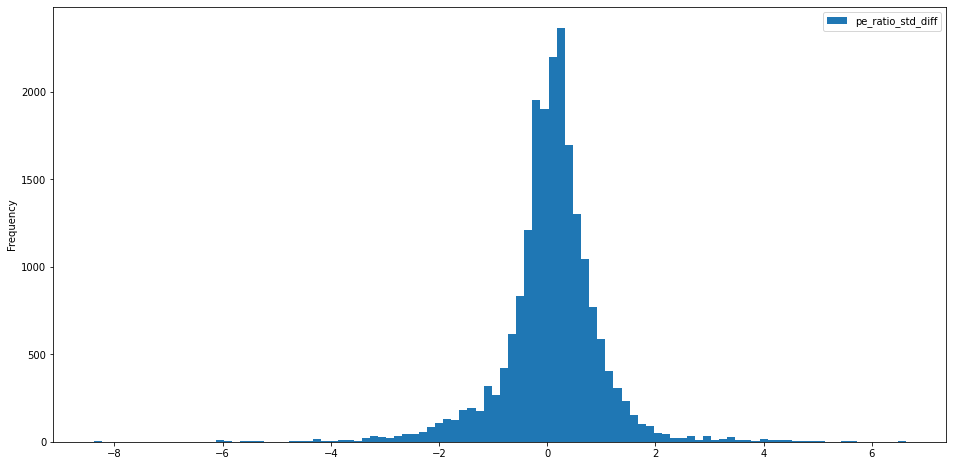

In [26]:
plot = trades[(trades['buy_signal?1'] == True) & (trades['market_cap'] > (trades['avg_market_cap'] + trades['std_market_cap']))][['next_7d_return']]
plot = trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] > 1)][['pe_ratio_std_diff']]
print(plot['pe_ratio_std_diff'].mean())
plot.plot(kind='hist', figsize=(16,8), bins=100)

0.10759284956460216


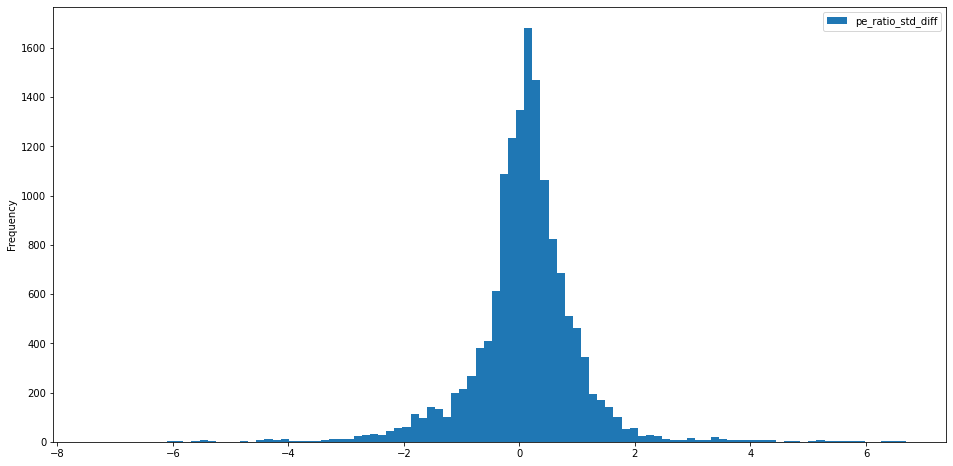

In [27]:
plot = trades[(trades['buy_signal?1'] == True) & (trades['next_21d_return'] < 1)][['pe_ratio_std_diff']]
print(plot['pe_ratio_std_diff'].mean())
plot.plot(kind='hist', figsize=(16,8), bins=100)

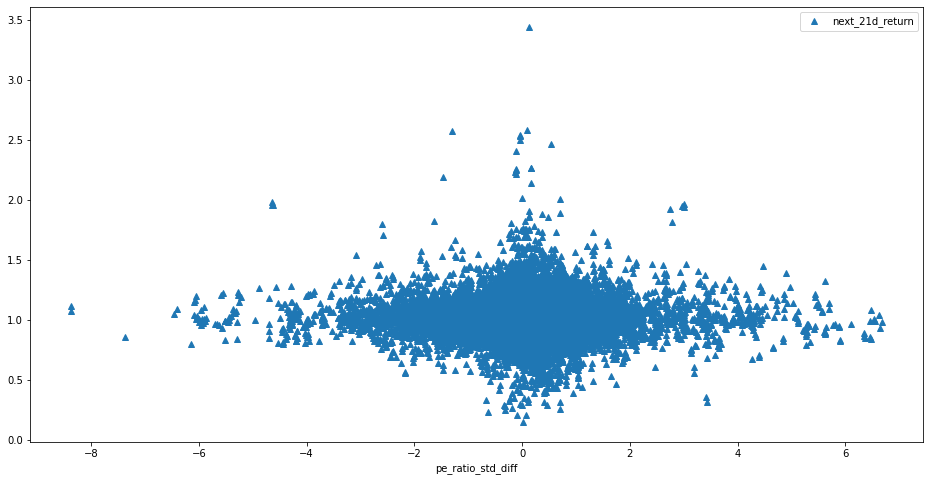

In [28]:
plot = trades[(trades['buy_signal?1'] == True)][['pe_ratio_std_diff', 'next_21d_return']]
plot.plot(x='pe_ratio_std_diff', y='next_21d_return', figsize=(16,8), linestyle='',  marker='^')

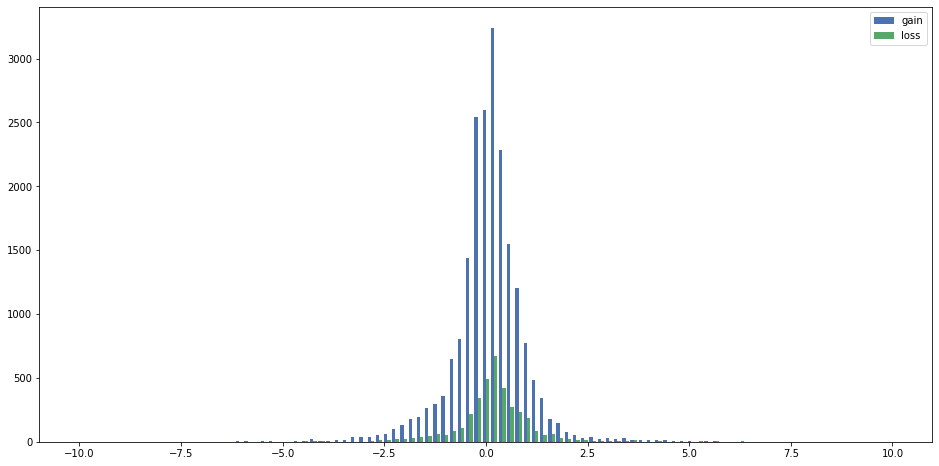

In [29]:


bins = np.linspace(-10, 10, 100)

plt.figure(figsize=(16,8))
plt.hist([x, y], bins, label=['gain', 'loss'])
plt.legend(loc='upper right')
plt.show()



In [6]:
trades.tail()

,index,timestamp,high_price,low_price,open_price,close_price_x,volume,symbol,interval,just_date,name,industry,sector,market_cap,pe_ratio,eps_ttm,avg_pe_ratio,std_pe_ratio,pe_ratio_std_diff,price_to_book_value,book_value_ttm,cap_cat,avg_market_cap,count_market_cap,sum_market_cap,std_market_cap,perc_market_cap,pct_change,weighted_change,unique_id,index_daily_return,moving_2d_return_index,moving_3d_return_index,moving_4d_return_index,moving_5d_return_index,moving_7d_return_index,moving_10d_return_index,moving_15d_return_index,moving_20d_return_index,moving_30d_return_index,moving_60d_return_index,moving_90d_return_index,moving_120d_return_index,moving_30d_return_mean_index,moving_30d_return_std_index,moving_30d_min_return_index,moving_60d_return_mean_index,moving_60d_return_std_index,moving_60d_min_return_index,moving_90d_return_mean_index,moving_90d_return_std_index,moving_90d_min_return_index,avg_volume,past_eps_ttm_60,past_eps_ttm_120,past_eps_ttm_180,past_eps_ttm_240,past_eps_ttm_300,past_eps_ttm_360,past_eps_ttm_420,past_eps_ttm_480,past_eps_ttm_540,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_180_240,eps_ttm_difference_240_300,eps_ttm_difference_300_360,eps_ttm_difference_360_420,eps_ttm_difference_420_480,eps_ttm_difference_480_540,eps_ttm_difference_0_60,year,week_no,weekday_no,close_price_shift,daily_return,moving_1d_return,moving_2d_return,moving_3d_return,moving_4d_return,moving_5d_return,moving_7d_return,moving_10d_return,moving_15d_return,moving_20d_return,moving_30d_return,moving_60d_return,moving_90d_return,moving_120d_return,moving_30d_return_mean,moving_30d_return_std,moving_30d_min_return,moving_60d_return_mean,moving_60d_return_std,moving_60d_min_return,moving_90d_return_mean,moving_90d_return_std,moving_90d_min_return,sma_10d,sma_10d_shift,sma_10d_coef,sma_10d_std,stationary_sma_10d,stationary_sma_10d_zscore,stationary_sma_10d_zscore_shift,stationary_sma_10d_zscore_shift_2,stationary_sma_10d_zscore_min,stationary_sma_10d_zscore_max,sma_20d,sma_20d_shift,sma_20d_coef,sma_20d_std,stationary_sma_20d,stationary_sma_20d_zscore,stationary_sma_20d_zscore_shift,stationary_sma_20d_zscore_shift_2,stationary_sma_20d_zscore_min,stationary_sma_20d_zscore_max,sma_50d,sma_50d_shift,sma_50d_coef,sma_50d_std,stationary_sma_50d,stationary_sma_50d_zscore,stationary_sma_50d_zscore_shift,stationary_sma_50d_zscore_shift_2,stationary_sma_50d_zscore_min,stationary_sma_50d_zscore_max,sma_100d,sma_100d_shift,sma_100d_coef,sma_100d_std,stationary_sma_100d,stationary_sma_100d_zscore,stationary_sma_100d_zscore_shift,stationary_sma_100d_zscore_shift_2,stationary_sma_100d_zscore_min,stationary_sma_100d_zscore_max,sma_200d,sma_200d_shift,sma_200d_coef,sma_200d_std,stationary_sma_200d,stationary_sma_200d_zscore,stationary_sma_200d_zscore_shift,stationary_sma_200d_zscore_shift_2,stationary_sma_200d_zscore_min,stationary_sma_200d_zscore_max,stationary_sma_10d_zscore_min_shift_1,stationary_sma_10d_zscore_min_shift_2,stationary_sma_10d_zscore_min_shift_3,stationary_sma_10d_zscore_min_all,stationary_sma_10d_zscore_min_all_shift,stationary_sma_10d_zscore_min_all_shift_2,stationary_sma_20d_zscore_min_shift_1,stationary_sma_20d_zscore_min_shift_2,stationary_sma_20d_zscore_min_shift_3,stationary_sma_20d_zscore_min_all,stationary_sma_20d_zscore_min_all_shift,stationary_sma_20d_zscore_min_all_shift_2,stationary_sma_100d_zscore_min_shift_1,stationary_sma_100d_zscore_min_shift_2,stationary_sma_100d_zscore_min_shift_3,stationary_sma_100d_zscore_min_all,stationary_sma_100d_zscore_min_all_shift,stationary_sma_100d_zscore_min_all_shift_2,stationary_sma_200d_zscore_min_shift_1,stationary_sma_200d_zscore_min_shift_2,stationary_sma_200d_zscore_min_shift_3,stationary_sma_200d_zscore_min_all,stationary_sma_200d_zscore_min_all_shift,stationary_sma_200d_zscore_min_all_shift_2,sma_10d_20d_ratio,sma_10d_20d_ratio_shift,sma_10d_20d_ratio_shift_2,sma_10d_20d_ratio_shift_3,sma_10d_20d_ratio_coef_2d,sma_10d_20d_ratio_avg,sma_10d_20d_ratio_std,sm

In [ ]:
for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:
    x = trades[(trades[signal] == True) & (trades['eps_ttm_difference_60_120'] < 0)]['next_21d_return']
    y = trades[(trades[signal] == True) & (trades['next_21d_return'] < 0.95)]['pe_ratio_std_diff']
        if x.mean() < y.mean():
            print(signal, industry, x.mean().round(2) - y.mean().round(2))
        else:
            print('weird', signal, industry, x.mean().round(2) - y.mean().round(2))

In [77]:
x = trades[trades['buy_signal?1'] == True][['next_21d_return', 'next_14d_return', 'next_7d_return',
                                        'next_5d_return',
                                        'eps_ttm_difference_60_120', 'eps_ttm_difference_120_180', 
                                        'eps_ttm_difference_180_240', 'eps_ttm_difference_240_300',
                                        'eps_ttm_difference_300_360', 'eps_ttm_difference_360_420',
                                        'eps_ttm_difference_420_480', 'eps_ttm_difference_480_540',
                                        'eps_ttm_difference_0_60']]

x = x.dropna()

In [78]:
x.head()

,next_21d_return,next_14d_return,next_7d_return,next_5d_return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_180_240,eps_ttm_difference_240_300,eps_ttm_difference_300_360,eps_ttm_difference_360_420,eps_ttm_difference_420_480,eps_ttm_difference_480_540,eps_ttm_difference_0_60
538,1.136215,1.109749,1.050504,1.019546,0.069892,0.075145,0.032836,0.012085,0.000000,0.009146,0.025000,0.045752,0.057789
540,1.142443,1.109339,1.064274,1.045427,0.069892,0.075145,0.032836,0.000000,0.012085,0.009146,0.025000,0.045752,0.057789
542,1.122194,1.108270,1.065658,1.057376,0.069892,0.075145,0.000000,0.032836,0.012085,0.009146,0.025000,0.045752,0.057789
626,0.870580,0.872485,0.821645,0.869746,-0.040380,0.057789,0.069892,0.075145,0.032836,0.012085,0.009146,0.025000,-0.101485
641,1.085485,0.936990,0.959064,0.972843,-0.040380,0.057789,0.069892,0.075145,0.032836,0.012085,0.009146,0.025000,-0.101485


In [3]:
from collections import Counter

In [4]:
positive = []
negative = []

column_names = ['eps_ttm_difference_60_120', 'eps_ttm_difference_120_180', 'eps_ttm_difference_0_60']
                

for signal in ['buy_signal?1', 'buy_signal?2', 'buy_signal?3', 'buy_signal?4', 'buy_signal?5']:

    x = trades[trades[signal] == True][['next_21d_return', 'next_14d_return', 'next_7d_return', 'next_5d_return',
                                        'eps_ttm_difference_60_120', 'eps_ttm_difference_120_180',
                                        'eps_ttm_difference_0_60']]

    x = x.dropna()
    
    for return_d in ['next_21d_return', 'next_14d_return', 'next_7d_return', 'next_5d_return']:
        for index, row in x.iterrows():
            results = [signal, return_d, row[return_d]]
            for column in column_names:
                if row[column] > 0:
                    results.append(True)
                elif (row[column] == 0) & (column == 'eps_ttm_difference_0_60'):
                    results.append(True)
                else:
                    results.append(False)
            
            if row[return_d] > 1:
                positive.append(results)
            else:
                negative.append(results)
            

In [5]:

results_df = pd.DataFrame(positive, columns = ['signal', 'return', 'return_no'] + column_names)
total_number_of_trades = results_df.groupby(['signal', 'return']).count()['eps_ttm_difference_0_60'].reset_index()
total_number_of_trades.columns = ['signal', 'return', 'number_of_trades']
results_df = pd.merge(results_df, total_number_of_trades, on = ['signal', 'return'])
names = list(results_df.columns)
names.remove('return_no')
results_df['sum'] = 1
analysis = results_df.groupby(names).sum().reset_index().sort_values('sum', ascending=False)
analysis['avg_return'] = analysis['return_no'] / analysis['sum']
analysis['perc'] = analysis['sum'] / analysis['number_of_trades']
analysis = analysis.sort_values(['signal', 'return', 'perc'], ascending=False)
analysis['cumsum_perc'] = analysis.groupby(['signal', 'return']).cumsum()['perc']
analysis['rank'] = analysis.groupby(['signal', 'return'])['cumsum_perc'].rank(method='max')
analysis[(analysis['rank'] < 3) & (analysis['return'] == 'next_21d_return')]


,signal,return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_0_60,number_of_trades,return_no,sum,avg_return,perc,cumsum_perc,rank
116,buy_signal?5,next_21d_return,False,False,True,1053,693.482034,653,1.061994,0.620133,0.620133,1.0
119,buy_signal?5,next_21d_return,True,True,True,1053,259.536648,246,1.055027,0.233618,0.853751,2.0
100,buy_signal?4,next_21d_return,False,False,True,10667,7489.861666,6955,1.076903,0.652011,0.652011,1.0
103,buy_signal?4,next_21d_return,True,True,True,10667,2286.177366,2139,1.068807,0.200525,0.852536,2.0
73,buy_signal?3,next_21d_return,False,False,True,13096,6774.779735,6316,1.072638,0.482285,0.482285,1.0
79,buy_signal?3,next_21d_return,True,True,True,13096,3227.671142,3019,1.069119,0.230528,0.712813,2.0
41,buy_signal?2,next_21d_return,False,False,True,7072,4012.550602,3722,1.078063,0.526301,0.526301,1.0
47,buy_signal?2,next_21d_return,True,True,True,7072,1440.078201,1348,1.068307,0.190611,0.716912,2.0
9,buy_signal?1,next_21d_return,False,False,True,24225,13587.024582,12551,1.082545,0.518101,0.518101,1.0
15,buy_signal?1,next_21d_return,True,True,True,24225,5011.444355,4642,1.079587,0.191620,0.709721,2.0


In [6]:
#analysis[analysis['cumsum_perc'] < 0.51]
#analysis[analysis['sum'] > 35]

In [7]:

results_df = pd.DataFrame(negative, columns = ['signal', 'return', 'return_no'] + column_names)
total_number_of_trades = results_df.groupby(['signal', 'return']).count()['eps_ttm_difference_0_60'].reset_index()
total_number_of_trades.columns = ['signal', 'return', 'number_of_trades']
results_df = pd.merge(results_df, total_number_of_trades, on = ['signal', 'return'])
names = list(results_df.columns)
names.remove('return_no')
results_df['sum'] = 1
analysis_neg = results_df.groupby(names).sum().reset_index().sort_values('sum', ascending=False)
analysis_neg['avg_return'] = analysis_neg['return_no'] / analysis_neg['sum']
analysis_neg['perc'] = analysis_neg['sum'] / analysis_neg['number_of_trades']
analysis_neg = analysis_neg.sort_values(['signal', 'return', 'perc'], ascending=False)
analysis_neg['cumsum_perc'] = analysis_neg.groupby(['signal', 'return']).cumsum()['perc']
analysis_neg['rank'] = analysis_neg.groupby(['signal', 'return'])['cumsum_perc'].rank(method='max')
analysis_neg[(analysis_neg['rank'] < 3) & (analysis_neg['return'] == 'next_21d_return')]


,signal,return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_0_60,number_of_trades,return_no,sum,avg_return,perc,cumsum_perc,rank
116,buy_signal?5,next_21d_return,False,False,True,866,529.765666,564,0.939301,0.651270,0.651270,1.0
119,buy_signal?5,next_21d_return,True,True,True,866,183.591638,196,0.936692,0.226328,0.877598,2.0
100,buy_signal?4,next_21d_return,False,False,True,8572,4605.769155,4944,0.931588,0.576762,0.576762,1.0
103,buy_signal?4,next_21d_return,True,True,True,8572,2247.853663,2422,0.928098,0.282548,0.859309,2.0
73,buy_signal?3,next_21d_return,False,False,True,10791,5117.258243,5480,0.933806,0.507831,0.507831,1.0
79,buy_signal?3,next_21d_return,True,True,True,10791,2304.379270,2542,0.906522,0.235567,0.743397,2.0
41,buy_signal?2,next_21d_return,False,False,True,5348,2889.215244,3096,0.933209,0.578908,0.578908,1.0
47,buy_signal?2,next_21d_return,True,True,True,5348,919.089975,992,0.926502,0.185490,0.764398,2.0
9,buy_signal?1,next_21d_return,False,False,True,17827,9102.086937,9766,0.932018,0.547821,0.547821,1.0
15,buy_signal?1,next_21d_return,True,True,True,17827,3420.770438,3700,0.924533,0.207550,0.755371,2.0


In [34]:
analysis.columns

Index(['signal', 'return', 'eps_ttm_difference_60_120',
       'eps_ttm_difference_120_180', 'eps_ttm_difference_0_60',
       'number_of_trades', 'return_no', 'sum', 'avg_return', 'perc',
       'cumsum_perc', 'rank'],
      dtype='object')

In [8]:

final = pd.merge(analysis, analysis_neg, on=['signal', 'return','eps_ttm_difference_60_120', 'eps_ttm_difference_120_180', 'eps_ttm_difference_0_60'], how='outer')
final['ratio'] = final['sum_x'] / final['sum_y']
final['sum_avg_return'] = ((final['sum_x'] * final['avg_return_x']) + (final['avg_return_y'] * final['sum_y'])) / (final['sum_y'] + final['sum_x'])



In [9]:
final[(final['return'] == 'next_21d_return') & (final['sum_avg_return'] > 1) & (final['ratio'] > 1)].sort_values(['signal', 'ratio', 'sum_avg_return'], ascending=False)



,signal,return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_0_60,number_of_trades_x,return_no_x,sum_x,avg_return_x,perc_x,cumsum_perc_x,rank_x,number_of_trades_y,return_no_y,sum_y,avg_return_y,perc_y,cumsum_perc_y,rank_y,ratio,sum_avg_return
11,buy_signal?5,next_21d_return,False,True,True,1053,77.738467,74,1.050520,0.070275,1.000000,4.0,866,35.113851,38,0.924049,0.043880,1.000000,4.0,1.947368,1.007610
9,buy_signal?5,next_21d_return,True,True,True,1053,259.536648,246,1.055027,0.233618,0.853751,2.0,866,183.591638,196,0.936692,0.226328,0.877598,2.0,1.255102,1.002553
10,buy_signal?5,next_21d_return,True,False,True,1053,86.570495,80,1.082131,0.075973,0.929725,3.0,866,64.061890,68,0.942087,0.078522,0.956120,3.0,1.176471,1.017786
8,buy_signal?5,next_21d_return,False,False,True,1053,693.482034,653,1.061994,0.620133,0.620133,1.0,866,529.765666,564,0.939301,0.651270,0.651270,1.0,1.157801,1.005134
24,buy_signal?4,next_21d_return,False,False,True,10667,7489.861666,6955,1.076903,0.652011,0.652011,1.0,8572,4605.769155,4944,0.931588,0.576762,0.576762,1.0,1.406756,1.016525
26,buy_signal?4,next_21d_return,True,False,True,10667,1077.346483,1002,1.075196,0.093935,0.946470,3.0,8572,668.838574,721,0.927654,0.084111,0.943420,3.0,1.389736,1.013456
27,buy_signal?4,next_21d_return,False,True,True,10667,615.319560,571,1.077617,0.053530,1.000000,4.0,8572,448.685084,485,0.925124,0.056580,1.000000,4.0,1.177320,1.007580
54,buy_signal?3,next_21d_return,False,False,False,13096,472.869152,423,1.117894,0.032300,0.975794,7.0,10791,220.484880,238,0.926407,0.022055,1.000000,8.0,1.777311,1.048947
51,buy_signal?3,next_21d_return,False,True,True,13096,944.235541,864,1.092865,0.065974,0.876374,4.0,10791,486.015217,544,0.893410,0.050412,0.872764,4.0,1.588235,1.015803
50,buy_signal?3,next_21d_return,True,False,True,13096,1409.387355,1278,1.102807,0.097587,0.810400,3.0,10791,769.150595,852,0.902759,0.078955,0.822352,3.0,1.500000,1.022788


In [56]:
final[(final['return'] == 'next_21d_return') & (final['ratio'] < 1)].sort_values(['signal','ratio'], ascending=False)

,signal,return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_0_60,number_of_trades_x,return_no_x,sum_x,avg_return_x,perc_x,cumsum_perc_x,rank_x,number_of_trades_y,return_no_y,sum_y,avg_return_y,perc_y,cumsum_perc_y,rank_y,ratio,sum_avg_return
19,buy_signal?5,next_21d_return,False,False,False,1199,82.084307,77,1.066030,0.064220,0.880734,4.0,1067,73.654093,79,0.932330,0.074039,0.786317,3.0,0.974684,0.998323
21,buy_signal?5,next_21d_return,True,True,False,1199,31.233308,30,1.041110,0.025021,0.967473,6.0,1067,40.226875,44,0.914247,0.041237,0.939082,6.0,0.681818,0.965678
22,buy_signal?5,next_21d_return,False,True,False,1199,28.166632,26,1.083332,0.021685,0.989158,7.0,1067,46.745780,51,0.916584,0.047798,0.897844,5.0,0.509804,0.972888
23,buy_signal?5,next_21d_return,True,False,False,1199,13.767278,13,1.059021,0.010842,1.000000,8.0,1067,24.734328,27,0.916086,0.025305,1.000000,8.0,0.481481,0.962540
53,buy_signal?4,next_21d_return,True,True,False,12709,520.046861,491,1.059159,0.038634,0.940279,6.0,10702,479.081481,516,0.928452,0.048215,0.883386,5.0,0.951550,0.992183
51,buy_signal?4,next_21d_return,False,False,False,12709,855.054311,792,1.079614,0.062318,0.856716,4.0,10702,788.616719,851,0.926694,0.079518,0.767800,3.0,0.930670,1.000408
49,buy_signal?4,next_21d_return,True,True,True,12709,2286.177366,2139,1.068807,0.168306,0.715556,2.0,10702,2247.853663,2422,0.928098,0.226313,0.688283,2.0,0.883154,0.994087
54,buy_signal?4,next_21d_return,False,True,False,12709,415.740948,388,1.071497,0.030530,0.970808,7.0,10702,414.156390,450,0.920348,0.042048,0.970753,7.0,0.862222,0.990331
85,buy_signal?3,next_21d_return,True,True,False,13629,486.701353,456,1.067328,0.033458,0.945704,6.0,11307,429.824955,480,0.895469,0.042452,0.942071,6.0,0.950000,0.979195


In [57]:
final[(final['return'] == 'next_14d_return') & (final['ratio'] < 1)].sort_values(['signal','ratio'], ascending=False)

,signal,return,eps_ttm_difference_60_120,eps_ttm_difference_120_180,eps_ttm_difference_0_60,number_of_trades_x,return_no_x,sum_x,avg_return_x,perc_x,cumsum_perc_x,rank_x,number_of_trades_y,return_no_y,sum_y,avg_return_y,perc_y,cumsum_perc_y,rank_y,ratio,sum_avg_return
29,buy_signal?5,next_14d_return,True,True,False,1219,34.112205,33,1.033703,0.027071,0.959803,6.0,1047,38.021688,41,0.927358,0.039160,0.980898,7.0,0.804878,0.974782
30,buy_signal?5,next_14d_return,False,True,False,1219,30.660063,29,1.057244,0.023790,0.983593,7.0,1047,44.887023,48,0.935146,0.045845,0.899713,5.0,0.604167,0.981131
57,buy_signal?4,next_14d_return,True,True,True,12705,2367.555106,2241,1.056473,0.176387,0.709642,2.0,10706,2170.637197,2320,0.935619,0.216701,0.695311,2.0,0.965948,0.994999
62,buy_signal?4,next_14d_return,False,True,False,12705,423.600525,401,1.056360,0.031562,0.971822,7.0,10706,407.579391,437,0.932676,0.040818,0.969550,7.0,0.917620,0.991861
94,buy_signal?3,next_14d_return,False,True,False,13139,414.810128,390,1.063616,0.029683,0.975264,7.0,11797,373.923981,409,0.914240,0.034670,0.977028,7.0,0.953545,0.987152
93,buy_signal?3,next_14d_return,True,True,False,13139,416.490177,394,1.057082,0.029987,0.945582,6.0,11797,498.982666,542,0.920632,0.045944,0.942358,6.0,0.726937,0.978069


In [117]:
analysis['sum'].std()

183.8733605243862

In [54]:
for key in list(neg.keys()):
    print(key, pos[key] / neg[key])

eps_ttm_difference_0_60 2.2254237288135594
('eps_ttm_difference_0_60', 'eps_ttm_difference_60_120', 'eps_ttm_difference_120_180', 'eps_ttm_difference_180_240') 1.8671808054841474
('eps_ttm_difference_0_60', 'eps_ttm_difference_60_120') 1.940909090909091
('eps_ttm_difference_0_60', 'eps_ttm_difference_60_120', 'eps_ttm_difference_120_180') 1.9047619047619047


## See Trades generated

In [4]:
def show_me_trades(no_of_days, buy_signal, clean_data):
    
    # Define min date
    min_date = clean_data['timestamp'].max() - timedelta(days=no_of_days)
    
    relevant_columns = ['timestamp', 'symbol','name', 'industry', 'next_7d_return', 'next_14d_return', 'next_21d_return']

    # Create Metrics
    metrics = clean_data[(clean_data[buy_signal] == True)][relevant_columns]
    metrics['year'] = pd.DatetimeIndex(metrics['timestamp']).year
    metrics_a = metrics.groupby(['symbol', 'name', 'industry', 'year']).count()['timestamp'].reset_index()
    metrics_b = metrics.groupby(['symbol', 'name', 'industry', 'year']).mean()[['next_7d_return', 'next_14d_return', 'next_21d_return']].reset_index()
    metrics = pd.merge(metrics_a, metrics_b, on=['symbol', 'name', 'industry', 'year'])

    # Create set of good symbols
    list_of_good = set(metrics[(metrics['next_14d_return'] > 1) & (metrics['next_21d_return'] > 1) & (metrics['year'] >= 2019)]['symbol'])

    # Run for the past 5 days
    print('Only with past record')
    display(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True) & (clean_data['symbol'].isin(list_of_good))][['timestamp', 'symbol', 'next_7d_return', 'next_14d_return', 'next_21d_return', 'close_price_x']])
    print('Everything')
    display(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True)][['timestamp', 'symbol', 'next_7d_return', 'next_14d_return', 'next_21d_return']])

    # Last days buys
    last_days_symbol = set(clean_data[(clean_data['timestamp'] > min_date) & (clean_data[buy_signal] == True) & (clean_data['symbol'].isin(list_of_good))]['symbol'])
    display(metrics[metrics['symbol'].isin(last_days_symbol)].sort_values('symbol'))

In [14]:
show_me_trades(1, 'buy_signal?1', trades)


Only with past record


,timestamp,symbol,next_7d_return,next_14d_return,next_21d_return,close_price_x
1097,2020-06-04 17:08:03,CVI,NaN,NaN,NaN,21.735001
1097,2020-06-04 17:08:34,ACH,NaN,NaN,NaN,4.965000
1097,2020-06-04 17:08:10,AGO,NaN,NaN,NaN,27.670000
1097,2020-06-04 17:09:32,SINA,NaN,NaN,NaN,33.090000
1006,2020-06-04 17:09:38,ACIA,NaN,NaN,NaN,67.699997
886,2020-06-04 17:09:45,GDS,NaN,NaN,NaN,61.669998
1097,2020-06-04 17:09:49,WB,NaN,NaN,NaN,33.369999
1097,2020-06-04 17:09:49,XRX,NaN,NaN,NaN,17.700001
1097,2020-06-04 17:09:51,HOG,NaN,NaN,NaN,24.275000
534,2020-06-04 17:09:47,IQ,NaN,NaN,NaN,17.540001


Everything


,timestamp,symbol,next_7d_return,next_14d_return,next_21d_return
1097,2020-06-04 17:08:03,CVI,NaN,NaN,NaN
1097,2020-06-04 17:08:34,ACH,NaN,NaN,NaN
1097,2020-06-04 17:08:10,AGO,NaN,NaN,NaN
1097,2020-06-04 17:09:32,SINA,NaN,NaN,NaN
1097,2020-06-04 17:09:31,WUBA,NaN,NaN,NaN
1006,2020-06-04 17:09:38,ACIA,NaN,NaN,NaN
886,2020-06-04 17:09:45,GDS,NaN,NaN,NaN
1097,2020-06-04 17:09:49,WB,NaN,NaN,NaN
1097,2020-06-04 17:09:49,XRX,NaN,NaN,NaN
1097,2020-06-04 17:09:51,HOG,NaN,NaN,NaN


,symbol,name,industry,year,timestamp,next_7d_return,next_14d_return,next_21d_return
96,ACH,Aluminum Corporation of China Limited,Basic Materials,2016,6,1.001415,1.039502,1.036299
97,ACH,Aluminum Corporation of China Limited,Basic Materials,2017,4,1.026926,1.081930,1.095492
98,ACH,Aluminum Corporation of China Limited,Basic Materials,2018,15,1.017897,0.989422,0.922496
99,ACH,Aluminum Corporation of China Limited,Basic Materials,2019,9,1.021207,1.019433,1.026615
100,ACH,Aluminum Corporation of China Limited,Basic Materials,2020,8,0.968739,0.932846,0.861761
106,ACIA,"Acacia Communications, Inc.",Technology,2016,4,0.962860,0.916769,0.927514
107,ACIA,"Acacia Communications, Inc.",Technology,2017,7,0.997969,0.977001,0.999495
108,ACIA,"Acacia Communications, Inc.",Technology,2019,4,0.988746,1.170199,1.193553
109,ACIA,"Acacia Communications, Inc.",Technology,2020,2,1.006477,1.020485,1.031481
234,AGO,Assured Guaranty Ltd.,Financial,2016,1,1.044911,1.085476,1.078595


In [9]:
def create_charts_1(df, symbol, field='close_price_x', include_sell=True, what_to_print=[1,2,3,4,5]):
    # Filter using the symbol
    snap_df = df[df['symbol'] == symbol]
    
    # Plot Close Price
    snap_df[field].plot(figsize=(16,8), color='blue', alpha=0.3, label=field)
    
    # Buy and Sell Signals 
    if 1 in what_to_print:
        snap_df[snap_df['buy_signal?1'] == True][field].plot(linestyle='', marker='^', color='green', alpha = 0.5, markersize = 9, label='Buy Signal 1')
    if 2 in what_to_print:
        snap_df[snap_df['buy_signal?2'] == True][field].plot(linestyle='', marker='^', color='orange', alpha = 0.5, markersize = 9, label='Buy Signal 2')
    if 3 in what_to_print:
        snap_df[snap_df['buy_signal?3'] == True][field].plot(linestyle='', marker='^', color='blue', alpha = 0.5, markersize = 9, label='Buy Signal 3')
    if 4 in what_to_print:
        snap_df[snap_df['buy_signal?4'] == True][field].plot(linestyle='', marker='^', color='blue', alpha = 0.5, markersize = 9, label='Buy Signal 4')
    if 5 in what_to_print:
        snap_df[snap_df['buy_signal?5'] == True][field].plot(linestyle='', marker='^', color='blue', alpha = 0.5, markersize = 9, label='Buy Signal 5')
    
    if include_sell == True:
        snap_df[snap_df['sell_signal?1'] == True][field].plot(linestyle='', marker='o', color='red', alpha = 0.5, markersize = 7, label='Sell Signal')
    
    if field == 'close_price_x':
        snap_df['sma_200d'].plot(color='red', alpha = 0.5, markersize = 7, label='200d')
        snap_df['sma_50d'].plot(color='green', alpha = 0.5, markersize = 7, label='50d')
    elif field == 'macd_line':
        snap_df['macd_signal_line'].plot(color='green', alpha = 0.5, markersize = 7, label='signal_line')

    # Title
    plt.title((symbol + ' - Buy/Sell Signals using ' + field), fontsize=15)
    plt.legend()
    
    plt.show();
              

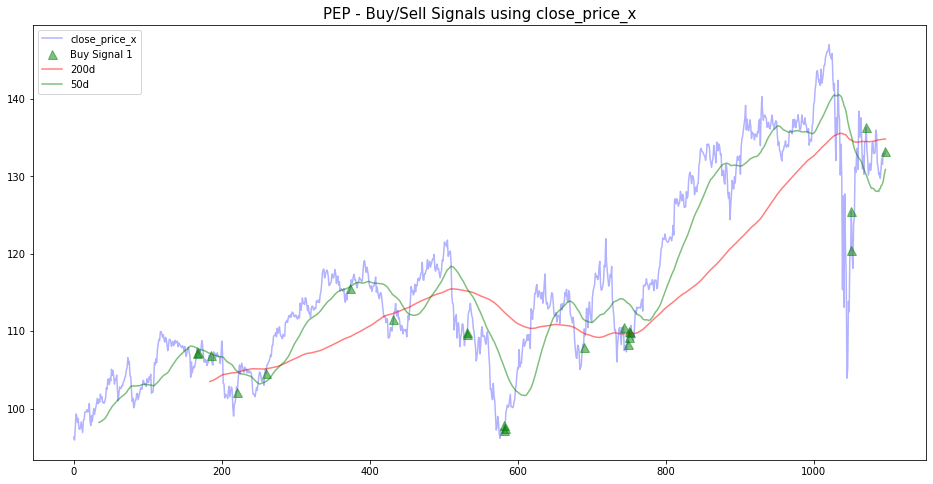

In [12]:
create_charts_1(trades, 'PEP', what_to_print=[1], include_sell=False)

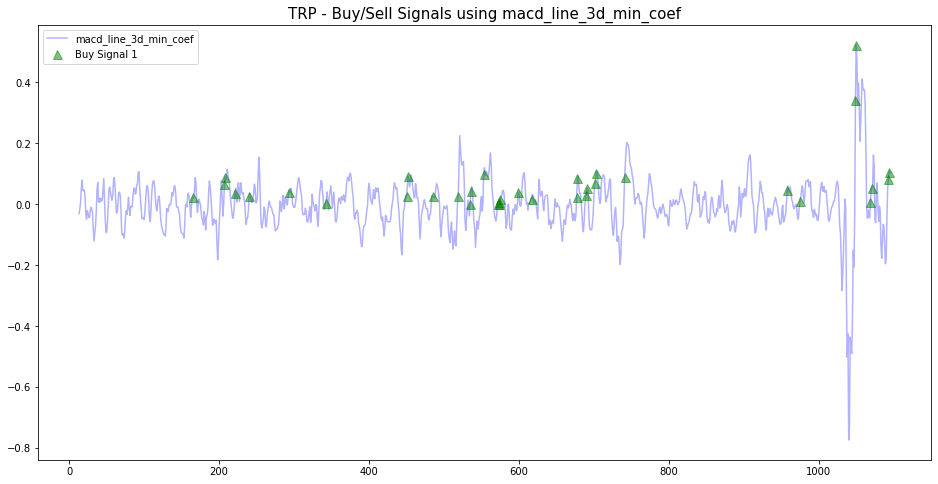

In [20]:
create_charts_1(trades, 'TRP', what_to_print=[1], include_sell=False, field='macd_line_3d_min_coef')

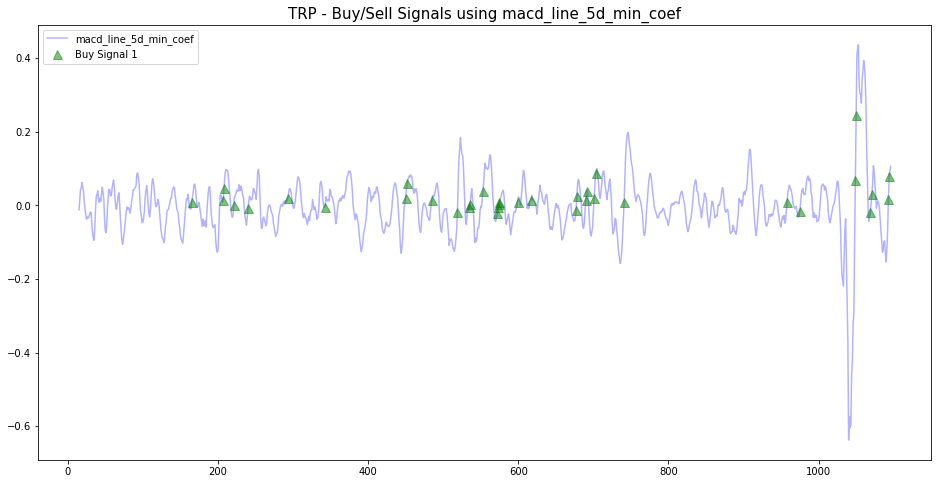

In [21]:
create_charts_1(trades, 'TRP', what_to_print=[1], include_sell=False, field='macd_line_5d_min_coef')

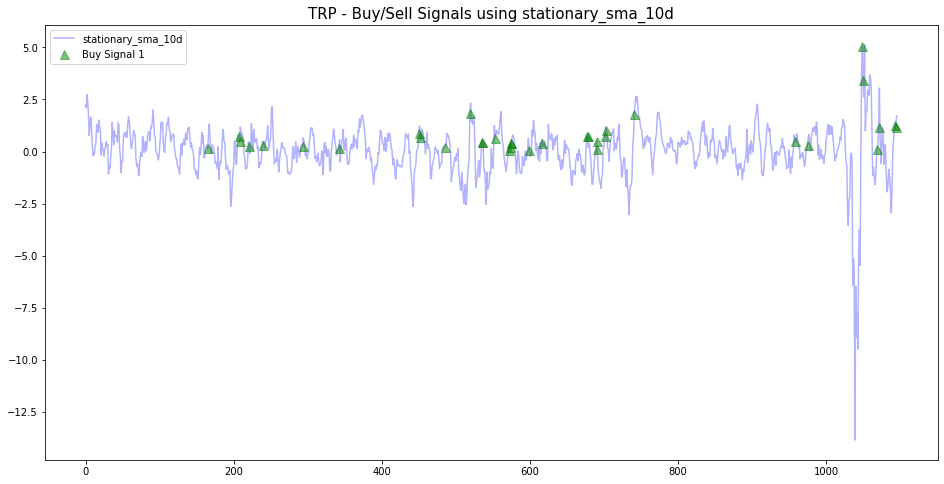

In [22]:
create_charts_1(trades, 'TRP', what_to_print=[1], include_sell=False, field='stationary_sma_10d')